In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [3]:
df = pd.read_csv('Company_Data.csv')

### EDA

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:xlabel='US', ylabel='count'>

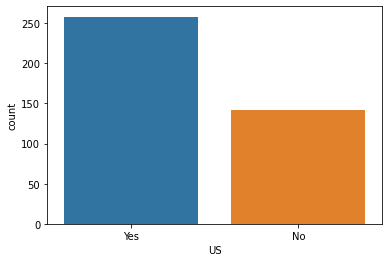

In [7]:
sns.countplot(x=df['US'])

In [8]:
print(df['ShelveLoc'].unique())

['Bad' 'Good' 'Medium']


In [9]:
print(df['US'].unique())

['Yes' 'No']


In [10]:
print(df['Urban'].unique())

['Yes' 'No']


<AxesSubplot:xlabel='Sales', ylabel='Income'>

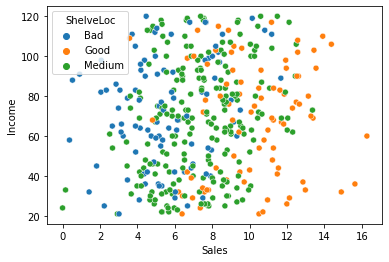

In [11]:
sns.scatterplot(x=df['Sales'],y=df['Income'],hue=df['ShelveLoc'])

# As we can see shelf's location in stores clearly influences sales.

In [12]:
def classify(Sales):
    if Sales < 7.49:
        return 'low_sales'
    else:
        return 'high_sales'
# Selecting mean value for segregation such that data set won't be imbalanced.

In [13]:
df['Sales'] = df['Sales'].apply(classify)

<AxesSubplot:xlabel='Sales', ylabel='count'>

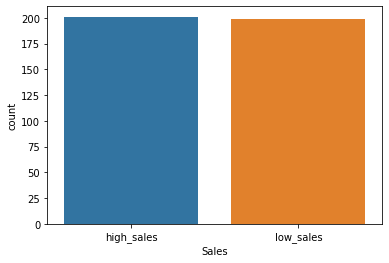

In [14]:
sns.countplot(x=df['Sales'])

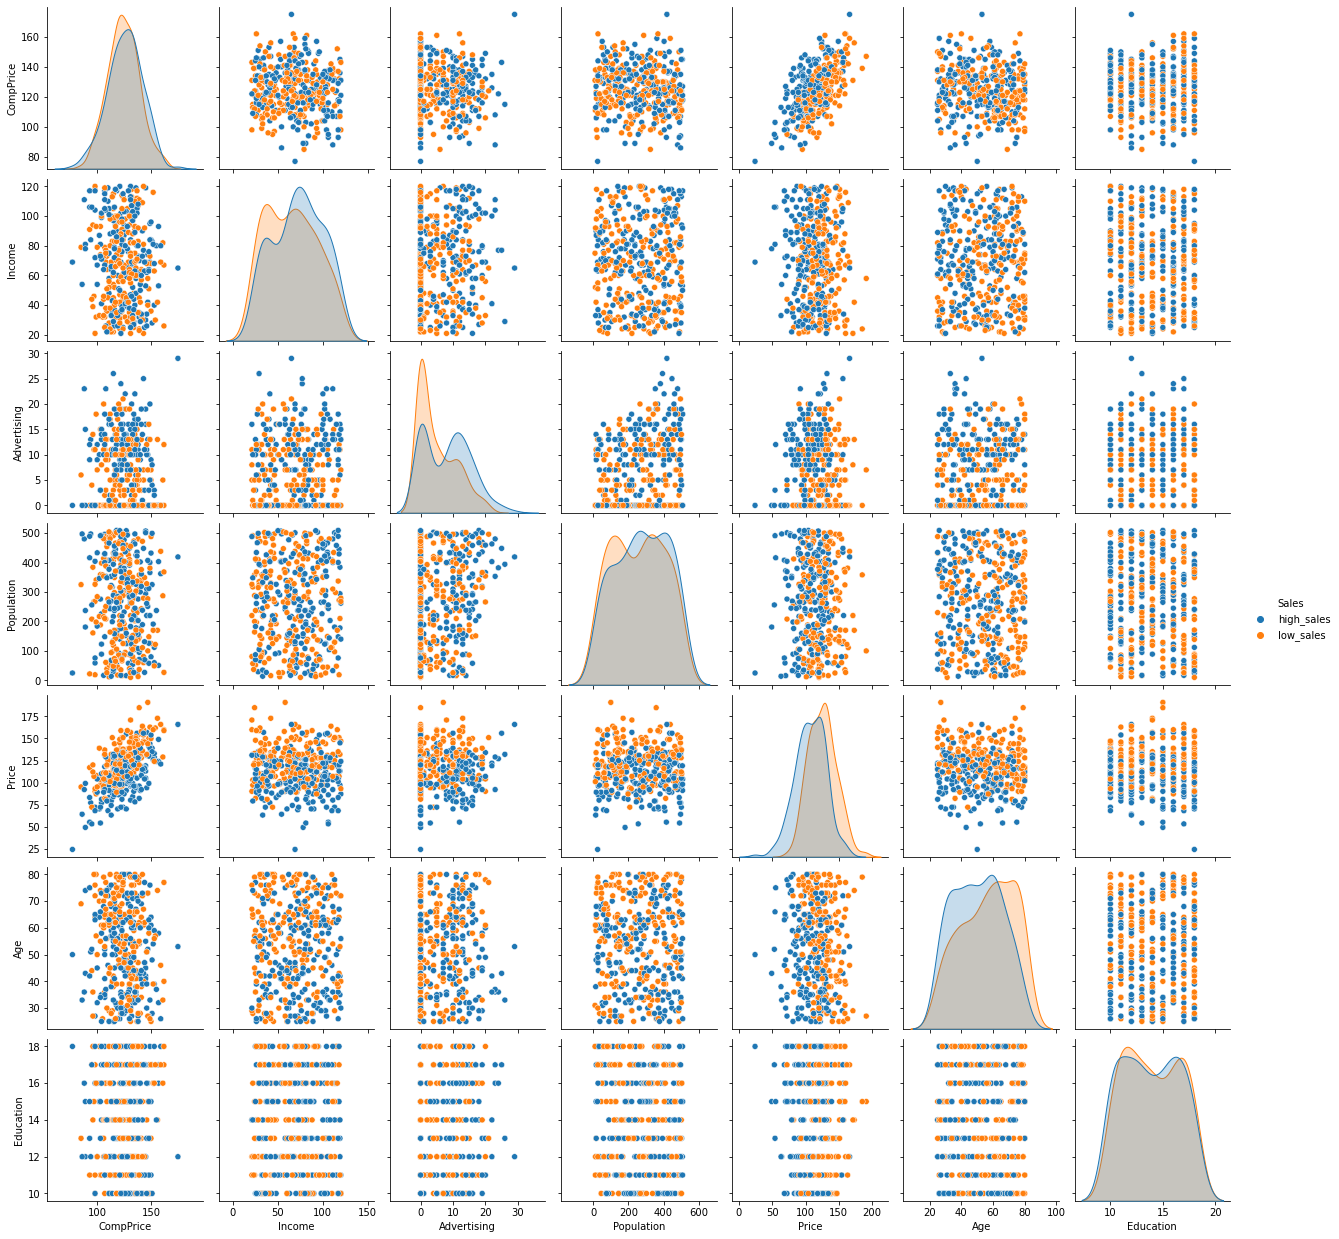

In [15]:
sns.pairplot(df,hue='Sales')

<AxesSubplot:xlabel='Price', ylabel='Education'>

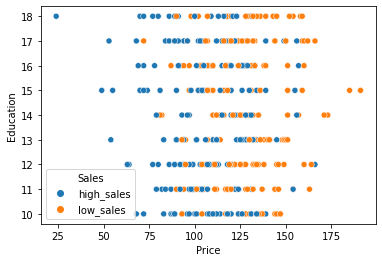

In [16]:
sns.scatterplot(x=df['Price'],y=df['Education'],hue=df['Sales'])

# There seems almost no influence of education-level on sales.

<AxesSubplot:xlabel='Advertising', ylabel='Price'>

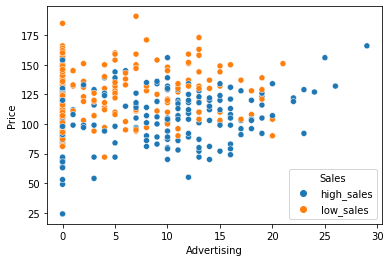

In [17]:
sns.scatterplot(x=df['Advertising'],y=df['Price'],hue=df['Sales'])

# Higher advertising budget seems to result in somewhat higher sales. 

### Feature Encoding

In [18]:
enc = LabelEncoder()

In [19]:
df['ShelveLoc'] = enc.fit_transform(df['ShelveLoc'])
df['US'] = enc.fit_transform(df['US'])
df['Sales'] = enc.fit_transform(df['Sales'])
df['Urban'] = enc.fit_transform(df['Urban'])

### Decision Tree Model-1 (build & validation)

In [20]:
X = df.drop('Sales',axis=1)
y = df['Sales'].values.reshape(-1, 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
rfc = RandomForestClassifier(oob_score=True,random_state=46)

In [23]:
n_estimators=[90,100,120]
max_features= [4,5,6,7,8,9,10]
criterion= ['gini','entropy']

In [24]:
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'criterion':criterion}

In [25]:
gsv = GridSearchCV(estimator=rfc,param_grid=param_grid)

In [26]:
gsv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=46),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [90, 100, 120]})

In [27]:
gsv.best_params_

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 90}

In [28]:
y_pred = gsv.predict(X_test)

In [29]:
print(confusion_matrix(y_test,y_pred))

[[36 12]
 [ 7 45]]


In [30]:
accuracy_score(y_test,y_pred)

0.81

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.79      0.87      0.83        52

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



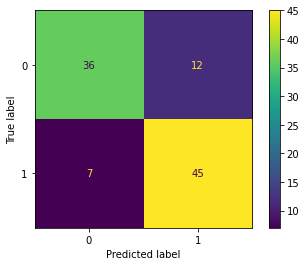

In [32]:
plot_confusion_matrix(gsv,X_test,y_test)

### Final Model

In [33]:
rfc = RandomForestClassifier(n_estimators=90, criterion='entropy', max_features=4,random_state=46)

In [34]:
rfc.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=90,
                       random_state=46)

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.8

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        48
           1       0.79      0.85      0.81        52

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



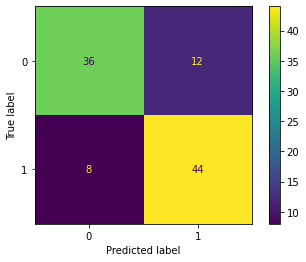

In [38]:
plot_confusion_matrix(rfc,X_test,y_test)

### Final Output

In [39]:
influncers = pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature Importance'])

In [40]:
influncers = influncers.sort_values('Feature Importance')
influncers

,Feature Importance
US,0.011875
Urban,0.012174
Education,0.051837
Population,0.076224
Income,0.094826
ShelveLoc,0.112462
Advertising,0.115655
Age,0.118601
CompPrice,0.140445
Price,0.265901


Text(0.5, 1.0, 'Feature Importance')

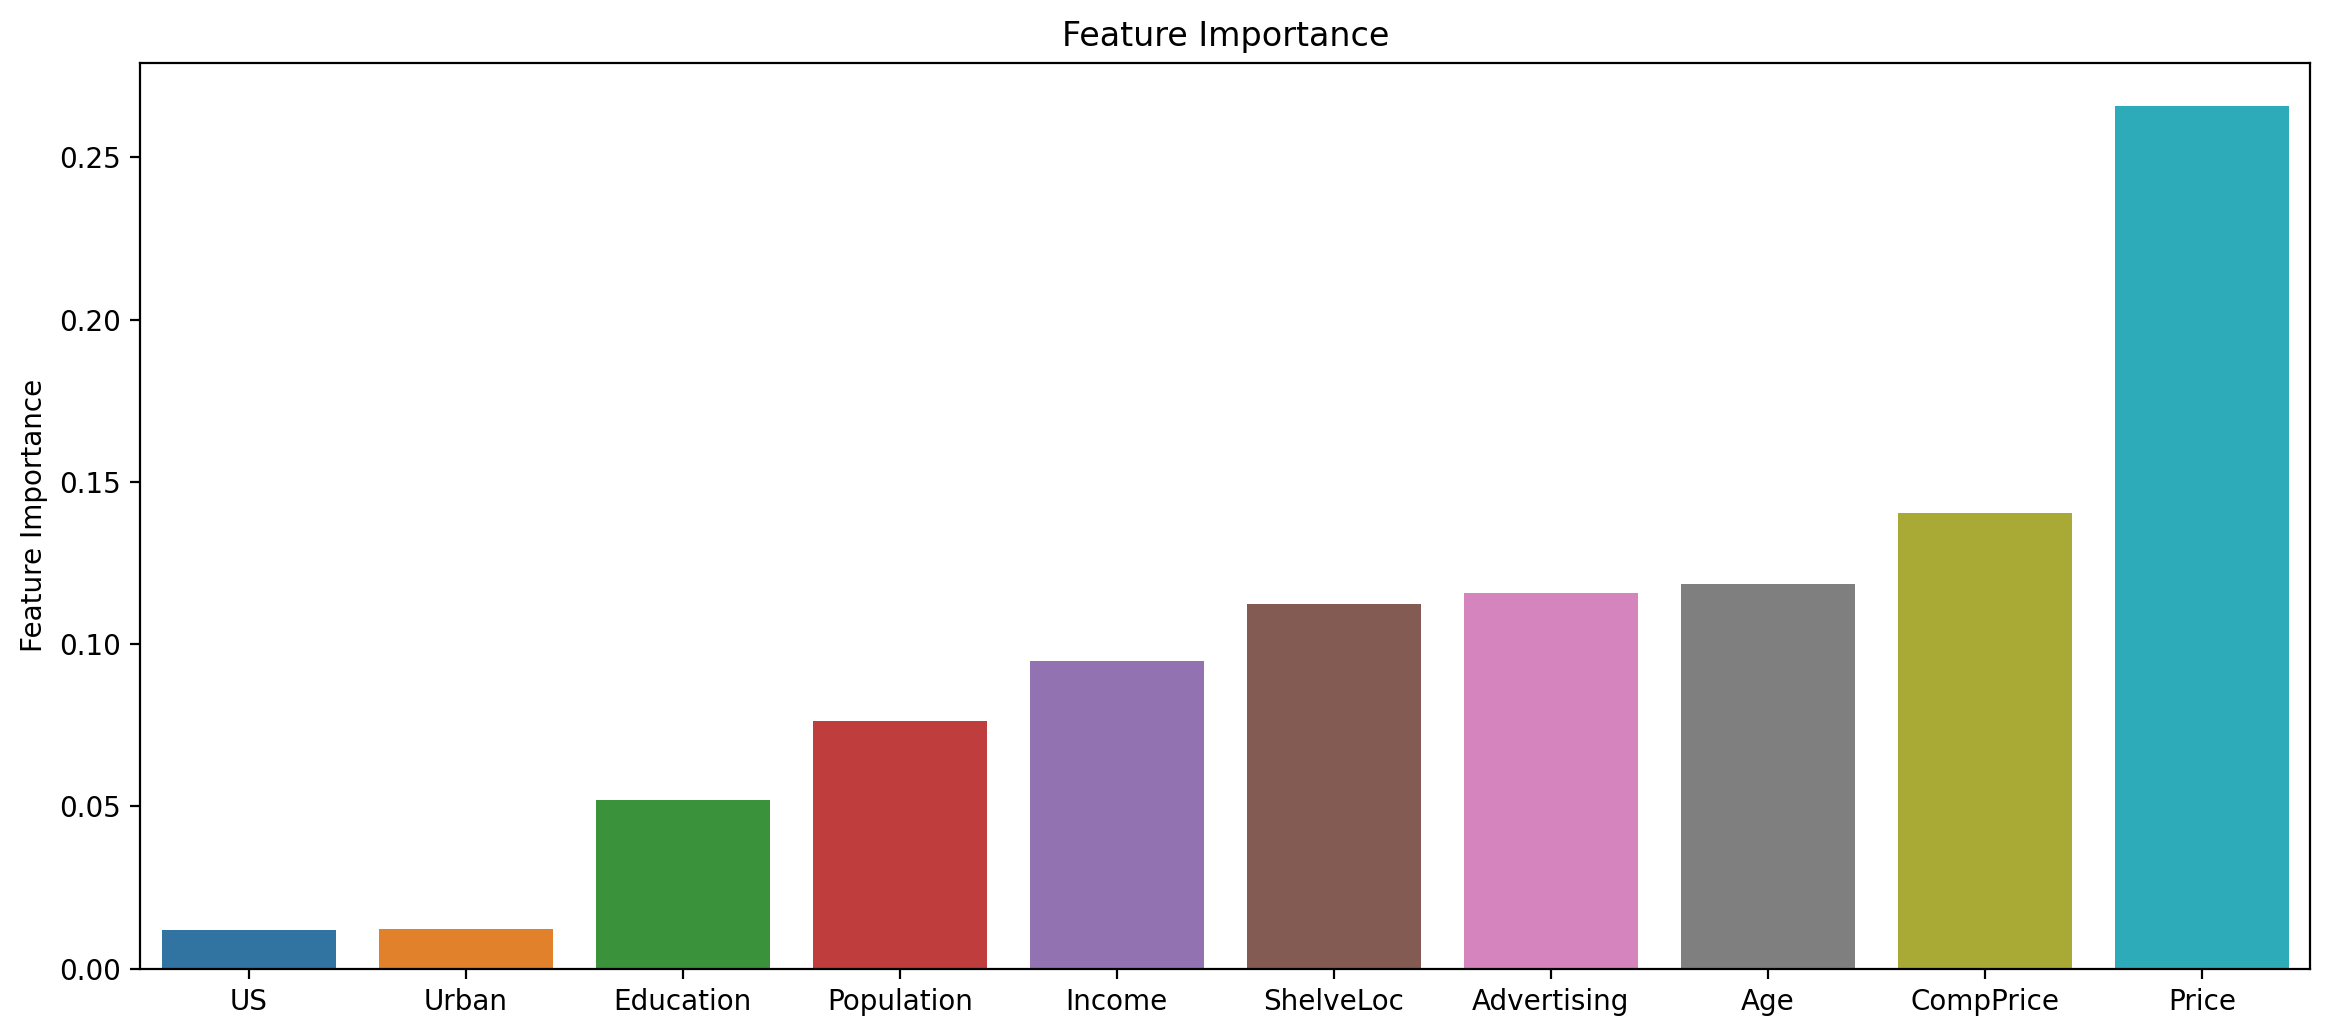

In [41]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=influncers.sort_values('Feature Importance'),x=influncers.sort_values('Feature Importance').index,
            y='Feature Importance')
plt.title('Feature Importance')

#### The 3 highest attributes or features that affect the sales are 'Price', 'Shelf Location at stores' & 'Competitor Price'.

### Boosting

#### AdaBoost

In [42]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [43]:
ada = AdaBoostClassifier()
param_grid = {'n_estimators':[80,90,100,110,120]}

In [44]:
grid = GridSearchCV(estimator=ada,param_grid=param_grid)

In [45]:
grid.fit(X_train,y_train.ravel())

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [80, 90, 100, 110, 120]})

In [46]:
grid.best_params_

{'n_estimators': 120}

In [47]:
grid.best_score_

0.8066666666666666

#### Final Adaboost model

In [48]:
ada = AdaBoostClassifier(n_estimators=100)

In [49]:
ada.fit(X_train,y_train.ravel())

AdaBoostClassifier(n_estimators=100)

In [50]:
y_pred = ada.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        48
           1       0.74      0.81      0.77        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



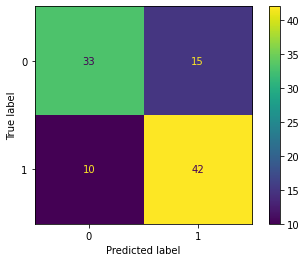

In [52]:
plot_confusion_matrix(ada,X_test,y_test)

In [53]:
influncers = pd.DataFrame(index=X.columns,data=ada.feature_importances_,columns=['Feature Importance'])

Text(0.5, 1.0, 'Feature Importance')

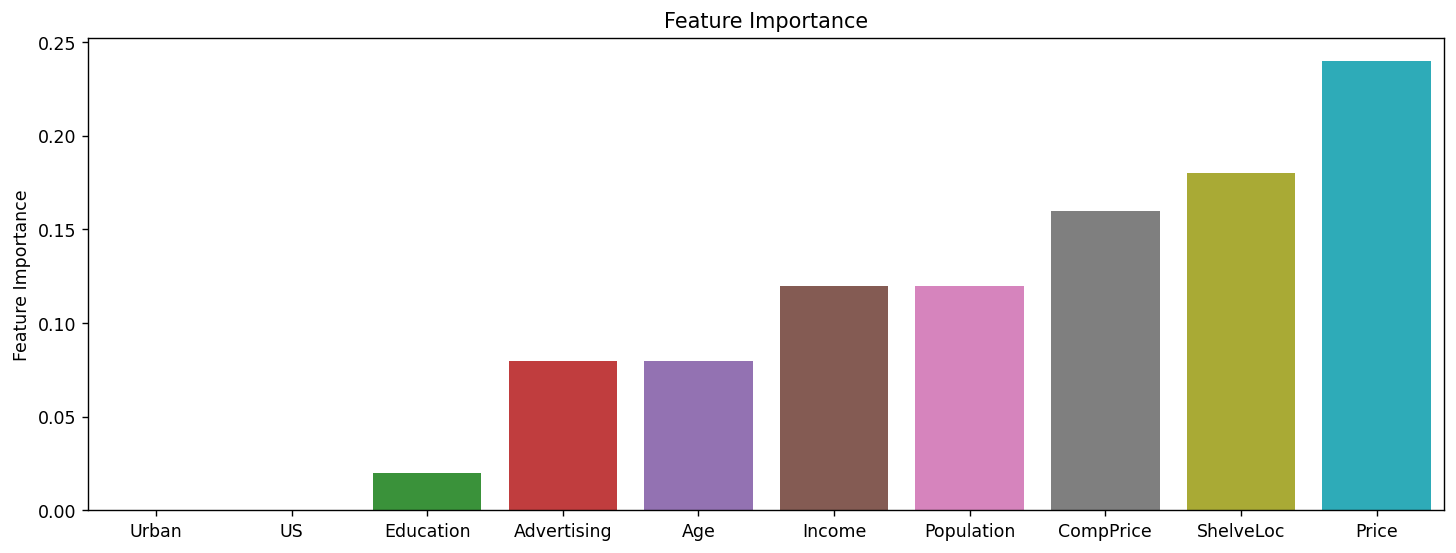

In [54]:
plt.figure(figsize=(14,5),dpi=125)
sns.barplot(data=influncers.sort_values('Feature Importance'),x=influncers.sort_values('Feature Importance').index,
            y='Feature Importance')
plt.title('Feature Importance')

#### The 3 highest attributes or features that affect the sales are 'Price', 'Shelf Location at stores' & 'Competitor Price'.

#### Gradient Boosting

In [55]:
gd = GradientBoostingClassifier()
param_grid = {'n_estimators':[40,50,70,80,90,100,120],
              'max_depth':[3,4,5,6]}

In [56]:
grid = GridSearchCV(estimator=gd,param_grid=param_grid)

In [57]:
grid.fit(X_train,y_train.ravel())

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [40, 50, 70, 80, 90, 100, 120]})

In [58]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 70}

In [59]:
grid.best_score_

0.8166666666666668

#### Final GradientBoost Model

In [60]:
gd = GradientBoostingClassifier(max_depth=3, n_estimators=70)

In [61]:
gd.fit(X_train,y_train.ravel())
y_pred = gd.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.80      0.87      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



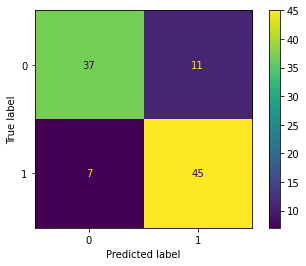

In [63]:
plot_confusion_matrix(gd,X_test,y_test)

In [64]:
gd.feature_importances_

array([0.12932297, 0.05837082, 0.12364065, 0.01483331, 0.35119389,
       0.20450672, 0.10096408, 0.014529  , 0.00116877, 0.00146978])

In [65]:
influncers = pd.DataFrame(index=X.columns,data=gd.feature_importances_,columns=['Feature Importance'])

Text(0.5, 1.0, 'Feature Importance')

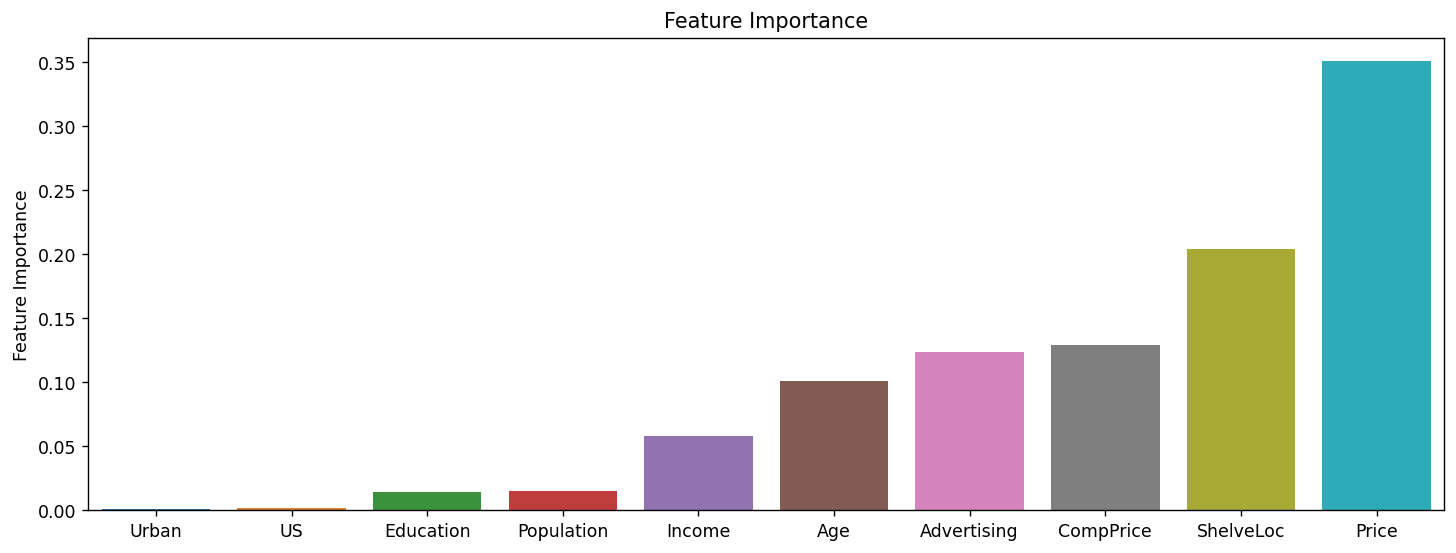

In [66]:
plt.figure(figsize=(14,5),dpi=125)
sns.barplot(data=influncers.sort_values('Feature Importance'),x=influncers.sort_values('Feature Importance').index,
            y='Feature Importance')
plt.title('Feature Importance')

#### The 3 highest attributes or features that affect the sales are 'Price', 'Shelf Location at stores' & 'Competitor Price'. 

#### These 3 features are consistantly top 3 across all the models.